# PfEMP1 protein total breadth 

In [496]:
## There are 431 PfEMP1 sequences from 7 genomes (3D7, IT, IGH, RAJ116, PFCLIN, IT4, DD2) that were used in the library 
## Because the proteins and peptides were collapsed based on simiilarity/identiity by CD-HIT, some peptides may be present in different 
## variants but ]thrown out because of redundancy. In order to calculate the actual breadth of variants recognized, 
## the hit PfEMP1 peptides must be mapped back to all PfEMP1 proteins that they belong to. 
## PREICH removed as it is not a falciparum PfEMP1
## Old annotation of 3D7 (PF and MAL) also removed

## List of all PfEMP1 proteins we started with - collect seq as dictionary 

fh = open('All_Var_Falciparome_space_removed.fasta','r')

var_seq = {}

## Get rid of PFREICH (That is P. reichnowi and a chimpanzee malaria parasite)
## Get rid of PF3D7 old annotation (starts with PF or MAL)
for line in fh: 
    if line[0] == '>':
        # get rid of PFREICH 
        if line[1:7]!= 'PREICH':
            # get rid of old 3D7 annotation that starts only with PF - by retaining all others as well as those that are not PF 
            if ((line[1:3] == 'PF') & (('PF3D7' in line) | ('PFIT' in line)|('PFCLIN' in line))) | ((line[1:3]!= 'PF')&(line[1:4]!='MAL')&(line[1:3]!='AA')): 
                gene = line[1:].strip('\n').replace('|',':')
                gene = gene.replace(',','_')
                gene = gene.split(':')[0].strip(' ')
                var_seq[gene]= next(fh).strip('\n')
fh.close()

len(var_seq)
    


431

In [497]:
## Collect all hit PfEMP1/VAr peptides in the dataset 


import re 
f = open('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil_allhits_sequences_9227.fa','r')

### forming a new one bec of incompatability with the ID of the whole set 
hit_gene_details = {} ## tuple of (gene name, product,sequence) 

i = 0
for line in f: 
    name = line.lstrip(">")
    name = name.strip("\n")
    name = name.replace('|',':')
   
    if re.search(r'rifin|RIFIN|Rifin',name): 
        gene = name.split(":")[0] 
        product = 'rifin'

    elif re.search(r'PfEMP1|PFEMP1|pfemp1|erythrocyte_membrane_protein_1',name):
        gene = name.split(":")[0] 
        product = 'var'
        
    elif re.search(r'virus|Virus',name):
        gene = name.split(":")[0] 
        product = 'virus'
    
    elif re.search(r'toxin|Toxin',name):
        gene = name.split(":")[0] 
        product = 'toxin'
        
    elif re.search(r'sapiens',name):
        gene = name.split(":")[0] 
        product = 'human'
    

    elif re.search(r'stevor|Stevor|STEVOR', name):
        gene = name.split(":")[0] 
        product = 'Stevor'

    elif re.search(r'SURFIN|surfin|Surfin',name):
        gene = name.split(":")[0] 
        product = 'Surfin'

    elif re.search(r'Pfmc-2TM|pfmc-2TM',  name):
        gene = name.split(":")[0] 
        product = 'Pfmc-2TM'

    elif 'AMA1' in name:
        gene = 'AMA1'
        product = 'AMA1'

    elif 'MSP1' in name:
        gene = 'MSP1'
        product = 'MSP1'

    elif 'MSPDB' in name:
        gene = 'MSPDB'
        product = 'MSPDB'

    elif re.search(r'^ano|SG6', name):
        gene = 'anopheles'
        product = 'anopheles protein'

    elif re.search(r'erythrocyte_binding_antigen-175', name):
        gene = 'EBA-175'
        product = 'EBA-175'

    elif re.search(r'erythrocyte_binding_antigen-140', name):
        gene = 'EBA-140'
        product = 'EBA-140'

    elif re.search(r'Circumsporozoite_protein|circumsporozoite_(CS)_protein', name):
        gene = 'circumsporozoite_(CS)_protein'
        product = 'circumsporozoite_(CS)_protein'
        
    elif ':' in name:
        try:
            gene = name.split(":")[0] 
            product = name.split(":")[4].split("=")[1]
            if (('unknown' in product) | ('putative' in product)):
                product = gene + product
            else:
                product = product
           
        except:
            print (name)
            
    elif 'var' in name:
        gene = name.split("_seq")[0]
        product = 'var'
    
    elif name[0:2]!= 'AA': 
        gene = name.split("_seq")[0]  ### pretty much all ofo the remaining ones without an annotation or a 'var' term are all var
        product = 'var'
    
    hit_gene_details[name] = (gene,product,next(f).strip('\n'))
       
    i = i+1
f.close()

var_hits = {k:v[2] for k,v in hit_gene_details.items() if v[1]=='var'}


len(var_hits)

2963

In [498]:
## For each VAR peptide, identify all the VAR proteins that it aligns to 

from collections import defaultdict 

var_peptides_all_proteins = defaultdict(set)

for pep in var_hits: 
    seq = var_hits[pep]
    
    var_peptides_all_proteins[pep] = set([varprtn.strip('\n') for varprtn,prtnseq in var_seq.items() if (seq in prtnseq) ])
    
[k for k,v in var_peptides_all_proteins.items() if len(v) ==0 ]    

['PREICHvar71_seq19',
 'PREICHvar71_seq16',
 'PREICHvar71_seq17',
 'PREICHvar38_seq22',
 'PREICHvar82_seq29',
 'PREICHvar77_seq25',
 'PREICHvar90_seq32',
 'PREICHvar90_seq31',
 'PREICHvar67_seq22',
 'AAQ73927_seq16',
 'PREICHvar95_seq17',
 'PREICHvar95_seq12',
 'AAQ73927_seq60',
 'PREICHvar54_seq30',
 'AAQ73927_seq85',
 'AAQ73927_seq86',
 'PREICHvar44_seq39',
 'AAQ73930_seq86',
 'PREICHvar52_seq11',
 'PREICHvar52_seq16',
 'PREICHvar28_seq8',
 'PREICHvar92_seq23',
 'PREICHvar62_seq17',
 'PREICHvar44_seq29',
 'PREICHvar44_seq28',
 'PREICHvar82_seq51',
 'PREICHvar77_seq53',
 'PREICHvar52_seq22',
 'AAQ73928_seq59',
 'PREICHvar85_seq67',
 'AAQ73927_seq59',
 'AAQ73927_seq50',
 'PREICHvar90_seq13',
 'PREICHvar46_seq15',
 'PREICHvar37_seq36',
 'PREICHvar37_seq30',
 'PREICHvar77_seq43',
 'PFE1640w_D2_seq2',
 'AAB60251_seq19',
 'PREICHvar37_seq28',
 'PREICHvar44_seq38',
 'PREICHvar93_seq23',
 'PREICHvar93_seq24',
 'PREICHvar53_seq16',
 'PFE1640w_seq92',
 'PREICHvar46_seq31',
 'PFE1640w_seq48',
 

In [499]:
import pandas as pd 

df_meta = pd.read_excel("Ugandan_samples_metadata.xlsx",header=0,index_col = 'Barcode',engine='openpyxl') ##sample name is the index


df_hits = pd.read_csv('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil.csv',header=0,index_col=0)
df_hits = df_hits.filter(regex='CK3|CT3',axis=1)

df_hits_meta_combined = pd.merge(df_hits.T, df_meta, left_index=True, right_index=True)

def childadult(row):
    age = row.age
    
    if (age >=7) & (age <= 11):
        status = 'child_7_11'
        
    elif (age >= 2) & (age < 4):
        status = 'child_2_4'
   
    elif (age >= 4) & (age < 7):
        status = 'child_4_7'
        
    else:
        status = 'adult'
    
    return status
    
def agecut(row):
    age = row.age
    
    if (age >= 2) & (age < 4):
        agecut = '2-4'
        
    elif (age >= 4) & (age < 7):
        agecut = '4-7'
    elif (age >= 7) & (age < 11):
        agecut = '7-11'
    else:
        agecut = '>18'
    return agecut

df_hits_meta_combined['status'] = df_hits_meta_combined.apply(childadult,axis=1)
df_hits_meta_combined['agecut'] = df_hits_meta_combined.apply(agecut,axis=1)


child_2_4_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_2_4'].eir_geom3
# print "EIR quantiles for children, min, 33%, 50%, 66%, max \n"
# print child_eir.quantile(q=0).round(2),child_eir.quantile(q=0.33).round(2),child_eir.quantile(q=0.5).round(2),child_eir.quantile(q=0.66).round(2),child_eir.quantile(q=1).round(2),"\n"
child_4_7_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_4_7'].eir_geom3
child_7_11_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_7_11'].eir_geom3

adult_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'adult'].eir_geom3
# print "\n EIR quantiles for adults, min, 33%, 50%, 66%, max \n"
# print adult_eir.quantile(q=0).round(2),adult_eir.quantile(q=0.33).round(2),adult_eir.quantile(q=0.5).round(2),adult_eir.quantile(q=0.66).round(2),adult_eir.quantile(q=1).round(2),"\n"


def eircut(row):
    eir = row.eir_geom3
    status = row.status
    
    if status == 'child_2_4':
        eir_50percent = child_2_4_eir.quantile(q=0.5)
        
    elif status == 'child_4_7':
        eir_50percent = child_4_7_eir.quantile(q=0.5)
        
    elif status == 'child_7_11':
        eir_50percent = child_7_11_eir.quantile(q=0.5)
                      
    elif status == 'adult':
        eir_50percent = adult_eir.quantile(q=0.5)
        
    
                 
    if eir <= eir_50percent:
        eir_cut = 'low'
        return eir_cut
                    
    else:
        eir_cut = 'high'
        return eir_cut
        
df_hits_meta_combined['eircut'] = df_hits_meta_combined.apply(eircut,axis=1)


In [500]:
## GO  THROUGH EACh sample and get the list of PfEMP1 peptides hit in that sample 
## Collect the set of proteins all of these peptides refer to
## This gives the overall breadth of PfEMP1 prpoteins reacted to in that sample 

df_hits_meta_combined['PfEMP1_protein_breadth'] = 0 
person_var_set
### Calculate breadth of reactivity to different VAR domains per person 


samples = list(df_hits.iloc[:,:199])

for person in samples:
    person_var_set = set()
    temp = df_hits[df_hits[person]==1]
    for pep in temp.index:
        var_proteins = var_peptides_all_proteins[pep]
        person_var_set.update(var_proteins)
    df_hits_meta_combined.loc[person,'PfEMP1_protein_breadth'] = len(person_var_set)

        
        


In [501]:
len(person_var_set)

242

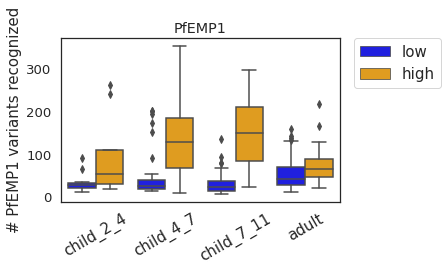

In [502]:

from matplotlib import pyplot as plt
import seaborn as sns 
sns.set_style('white')

fig, ax = plt.subplots(figsize=(5,3))
palette = {'high':'orange','low':'blue'}

sns.boxplot(
            x="status", y="PfEMP1_protein_breadth", data=df_hits_meta_combined , order = ['child_2_4','child_4_7','child_7_11','adult'],  dodge=True,hue= 'eircut',hue_order=['low','high'],ax=ax,
           palette=palette
            ).set_title('PfEMP1')
#sns.stripplot(x="status", y="PfEMP1_protein_breadth", data=df_hits_meta_combined , order = ['child_2_4','child_4_7','child_7_11','adult'],  dodge=True,hue= 'eircut',hue_order=['low','high'],ax=ax).set_title('PfEMP1')

# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation = 30)
#ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)
plt.xlabel('')
plt.ylabel('# PfEMP1 variants recognized',fontsize = 15)

plt.savefig('Fig2e_PfEMP1_breadth.pdf',dpi=800,bbox_inches = 'tight')
plt.show()



In [503]:
a = df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_2_4')&(df_hits_meta_combined['eircut'] =='low')]['PfEMP1_protein_breadth']
b = df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_4_7')&(df_hits_meta_combined['eircut'] =='low')]['PfEMP1_protein_breadth']
c =df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_7_11')&(df_hits_meta_combined['eircut'] =='low')]['PfEMP1_protein_breadth']
d =df_hits_meta_combined[(df_hits_meta_combined['status'] =='adult')&(df_hits_meta_combined['eircut'] =='low')]['PfEMP1_protein_breadth']

e=df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_2_4')&(df_hits_meta_combined['eircut'] =='high')]['PfEMP1_protein_breadth']
f=df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_4_7')&(df_hits_meta_combined['eircut'] =='high')]['PfEMP1_protein_breadth']
g=df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_7_11')&(df_hits_meta_combined['eircut'] =='high')]['PfEMP1_protein_breadth']
h=df_hits_meta_combined[(df_hits_meta_combined['status'] =='adult')&(df_hits_meta_combined['eircut'] =='high')]['PfEMP1_protein_breadth']

from scipy import stats 

print (stats.ks_2samp(a,d))
print (stats.ks_2samp(b,d))
print (stats.ks_2samp(c,d))
print (stats.ks_2samp(b,c))

print (stats.ks_2samp(e,h))
print (stats.ks_2samp(f,h))
print (stats.ks_2samp(g,h))
print (stats.ks_2samp(f,g))


print (a.median())
print (b.median())
print (c.median())
print (d.median())
print (e.median())
print (f.median())
print (g.median())
print (h.median())

KstestResult(statistic=0.4, pvalue=0.15979676241336072)
KstestResult(statistic=0.36666666666666664, pvalue=0.034580084963334506)
KstestResult(statistic=0.4, pvalue=0.015643390496754332)
KstestResult(statistic=0.26666666666666666, pvalue=0.23907300248018645)
KstestResult(statistic=0.2720306513409962, pvalue=0.5883091538739198)
KstestResult(statistic=0.496551724137931, pvalue=0.0005453130750171509)
KstestResult(statistic=0.5310344827586206, pvalue=0.0001550557855197754)
KstestResult(statistic=0.2, pvalue=0.5940706297759378)
28.0
25.0
22.5
42.0
53.0
128.0
150.0
65.0


# Domain classification 



In [504]:
### Parsing the domains for VAR sequences 

## Domain classification done with VarDom 1.0 server - http://www.cbs.dtu.dk/services/VarDom/

## /data/madhura/sequencing/Falciparome_phage/Resources/Var_sequences_Sofonias/All_Var_Falciparome.fasta was fed in to this server 
## for domain classification 

## Parsing 

from collections import defaultdict 

fh = open('VarDom_output_classification_AllVarFalciparome.txt','r')

var_domains = defaultdict(dict)
for line in fh: 
    if line[0:15] == 'Query sequence:':
        gene = line.split(":")[1].strip('\n').lstrip(' ')
      
    elif line == 'Parsed for domains:\n':
        next(fh) 
        next(fh) 
        for i in range(0,100): ### goiong through a loop until all domains are collected  
            lne = next(fh) 
            if lne != '\n':  ### collect all domains until reaching a new line character that marks the end of domains 
                
                item = lne.split()
                dom = item[0]
                start,end = item[2],item[3].split()[0]
                    ### assign domains to only PfEMP1 that are not PREICH or old 3D7 annottaiotn 
                if (gene in var_seq.keys()):
    
                    var_domains[gene][(start,end)] = dom 
                else: 
                    print (gene)
            else:
                break ### stop this loop and go on to the main loop 
        else:
            continue
            
fh.close() 

len(var_domains)

MAL6P1.1
MAL6P1.1
MAL6P1.1
MAL6P1.1
MAL6P1.1
MAL6P1.1
MAL6P1.252
MAL6P1.252
MAL6P1.252
MAL6P1.252
MAL6P1.252
MAL6P1.252
MAL6P1.252
PFF0020c
PFF0020c
PFF0020c
PFF0020c
MAL6P1.316
MAL6P1.316
MAL6P1.316
MAL6P1.316
MAL6P1.316
MAL6P1.316
MAL6P1.316
MAL6P1.316
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL6P1.4
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.1
MAL7P1.212
MAL7P1.212
MAL7P1.212
MAL7P1.212
MAL7P1.212
MAL7P1.212
MAL7P1.50
MAL7P1.50
MAL7P1.50
MAL7P1.50
MAL7P1.50
MAL7P1.50
MAL7P1.55
MAL7P1.55
MAL7P1.55
MAL7P1.55
MAL7P1.55
MAL7P1.55
MAL7P1.56
MAL7P1.56
MAL7P1.56
MAL7P1.56
MAL7P1.56
MAL7P1.56
MAL8P1.220
MAL8P1.220
MAL8P1.220
MAL8P1.220
MAL8P1.220
MAL8P1.220
PF07_0048
PF07_0048
PF07_0048
PF07_0048
PF07_0048
PF07_0048
PF07_0049
PF07_0049
PF07_0049
PF07_0049
PF07_0049
PF07_0049
PF07_0050
PF07_0050
PF07_0050
PF07_0050
PF07_0050
PF07_0050
PF07_0051
PF07_0051
PF07_0051
PF07_0051
PF07_0051
PF07_0051
PF07_0139
PF0

431

In [505]:
### collect all VAR proteins that each hit peptide aligns to and the position where the sequence starts within the protein for each hit peptide
from collections import defaultdict 

## Collect all hit PfEMP1/VAr peptides in the dataset 


import re 
f = open('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil_allhits_sequences_9227.fa','r')

### forming a new one bec of incompatability with the ID of the whole set 
hit_gene_details = {} ## tuple of (gene name, product,sequence) 

i = 0
for line in f: 
    name = line.lstrip(">")
    name = name.strip("\n")
    name = name.replace('|',':')
   
    if re.search(r'rifin|RIFIN|Rifin',name): 
        gene = name.split(":")[0] 
        product = 'rifin'

    elif re.search(r'PfEMP1|PFEMP1|pfemp1|erythrocyte_membrane_protein_1',name):
        gene = name.split(":")[0] 
        product = 'var'
        
    elif re.search(r'virus|Virus',name):
        gene = name.split(":")[0] 
        product = 'virus'
    
    elif re.search(r'toxin|Toxin',name):
        gene = name.split(":")[0] 
        product = 'toxin'
        
    elif re.search(r'sapiens',name):
        gene = name.split(":")[0] 
        product = 'human'
    

    elif re.search(r'stevor|Stevor|STEVOR', name):
        gene = name.split(":")[0] 
        product = 'Stevor'

    elif re.search(r'SURFIN|surfin|Surfin',name):
        gene = name.split(":")[0] 
        product = 'Surfin'

    elif re.search(r'Pfmc-2TM|pfmc-2TM',  name):
        gene = name.split(":")[0] 
        product = 'Pfmc-2TM'

    elif 'AMA1' in name:
        gene = 'AMA1'
        product = 'AMA1'

    elif 'MSP1' in name:
        gene = 'MSP1'
        product = 'MSP1'

    elif 'MSPDB' in name:
        gene = 'MSPDB'
        product = 'MSPDB'

    elif re.search(r'^ano|SG6', name):
        gene = 'anopheles'
        product = 'anopheles protein'

    elif re.search(r'erythrocyte_binding_antigen-175', name):
        gene = 'EBA-175'
        product = 'EBA-175'

    elif re.search(r'erythrocyte_binding_antigen-140', name):
        gene = 'EBA-140'
        product = 'EBA-140'

    elif re.search(r'Circumsporozoite_protein|circumsporozoite_(CS)_protein', name):
        gene = 'circumsporozoite_(CS)_protein'
        product = 'circumsporozoite_(CS)_protein'
        
    elif ':' in name:
        try:
            gene = name.split(":")[0] 
            product = name.split(":")[4].split("=")[1]
            if (('unknown' in product) | ('putative' in product)):
                product = gene + product
            else:
                product = product
           
        except:
            print (name)
            
    elif 'var' in name:
        gene = name.split("_seq")[0]
        product = 'var'
    
    elif name[0:2]!= 'AA': 
        gene = name.split("_seq")[0]  ### pretty much all ofo the remaining ones without an annotation or a 'var' term are all var
        product = 'var'
    
    hit_gene_details[name] = (gene,product,next(f).strip('\n'))
       
    i = i+1
f.close()

var_hits = {k:v[2] for k,v in hit_gene_details.items() if v[1]=='var'}


len(var_hits)

var_peptides_all_proteins = defaultdict(set)

for pep in var_hits: 
    seq = var_hits[pep]
    
    var_peptides_all_proteins[pep] = set([(varprtn.strip('\n')+'|'+ str(prtnseq.find(seq))) for varprtn,prtnseq in var_seq.items() if (seq in prtnseq) ])
    


In [506]:
len(var_peptides_all_proteins)

2963

In [507]:
### Then get those hit peptides that are Vars and assign domains to them based on wheere they are aligninging in all VAR proteins 

var_peptides_all_proteins_withdomains = defaultdict(set)

for pep,val in var_peptides_all_proteins.items():
    for z in val: ## going through each protein match for the peptide
      
        gene = z.split('|')[0].strip(' ')
        start = int(z.split('|')[-1])
        end = start + 61 
        seqaa = set(range(start,end))
      
        try:
            domainlist = list(var_domains[gene].keys())
            for x in domainlist:
                domain = var_domains[gene][x]
                start,end = int(x[0]),int(x[1])
                domaa = set(range(start,end))
                overlap = len(seqaa.intersection(domaa))
                if overlap >= 20:
                    var_peptides_all_proteins_withdomains[pep].add(gene+'_'+domain)

        except:
            print (gene)




In [508]:
var_peptides_all_proteins_withdomains

defaultdict(set,
            {'HB3var16_seq82': {'HB3var16_ATS'},
             'HB3var03_seq58': {'HB3var03_DBLg', 'HB3var05_DBLg'},
             'HB3var03_seq59': {'HB3var03_DBLg', 'HB3var05_DBLg'},
             'PFIT_bin04300.1-p1:transcript=PFIT_bin04300.1:gene=PFIT_bin04300:organism=Plasmodium_falciparum_IT:gene_product=erythrocyte_membrane_protein_1__PfEMP1:transcript_product=erythrocyte_membrane_protein_1__PfEMP1:location=PfIT_bin_v3_archived_contig_10:19019-26919(+):protein_length=2256:sequence_SO=random_sequence:SO=protein_coding_seq47': {'IT4var45_DBLd',
              'PFIT_bin04300.1-p1_DBLd'},
             'PF3D7_1373500.1-p1:transcript=PF3D7_1373500.1:gene=PF3D7_1373500:organism=Plasmodium_falciparum_3D7:gene_product=erythrocyte_membrane_protein_1__PfEMP1:transcript_product=erythrocyte_membrane_protein_1__PfEMP1:location=Pf3D7_13_v3:2884786-2892340(-):protein_length=2223:sequence_SO=chromosome:SO=protein_coding_seq12': {'PF3D7_1373500.1-p1_DBLa'},
             'PF3D7_137350

In [509]:
### proportion of representation of domains in HITS 

## number of var genes with each domain

## Get the number of var variants for each domain 

from collections import defaultdict 
domain_count_all = defaultdict(int)
all_domains = defaultdict(set)
for k,v in var_domains.items():
    for k1,v1 in v.items():
        all_domains[v1].add(k)
        
for i,v in all_domains.items():
    domain_count_all[i] = len(v)
print(domain_count_all)

defaultdict(<class 'int'>, {'NTS': 391, 'DBLa': 394, 'CIDRa': 346, 'DBLd': 326, 'CIDRb': 230, 'ATS': 355, 'DBLe': 93, 'DBLg': 154, 'DBLb': 145, 'CIDRg': 109, 'DBLz': 71, 'CIDRd': 23, 'NTSpam': 10, 'DBLpam1': 10, 'DBLpam2': 10, 'CIDRpam': 10, 'DBLpam3': 10, '[no': 7})


In [510]:
import pandas as pd 

df_meta = pd.read_excel("Ugandan_samples_metadata.xlsx",header=0,index_col = 'Barcode',engine='openpyxl') ##sample name is the index


df_hits = pd.read_csv('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil.csv',header=0,index_col=0)
df_hits = df_hits.filter(regex='CK3|CT3',axis=1)

df_hits_meta_combined = pd.merge(df_hits.T, df_meta, left_index=True, right_index=True)

def childadult(row):
    age = row.age
    
    if (age >=7) & (age <= 11):
        status = 'child_7_11'
        
    elif (age >= 2) & (age < 4):
        status = 'child_2_4'
   
    elif (age >= 4) & (age < 7):
        status = 'child_4_7'
        
    else:
        status = 'adult'
    
    return status
    
def agecut(row):
    age = row.age
    
    if (age >= 2) & (age < 4):
        agecut = '2-4'
        
    elif (age >= 4) & (age < 7):
        agecut = '4-7'
    elif (age >= 7) & (age < 11):
        agecut = '7-11'
    else:
        agecut = '>18'
    return agecut

df_hits_meta_combined['status'] = df_hits_meta_combined.apply(childadult,axis=1)
df_hits_meta_combined['agecut'] = df_hits_meta_combined.apply(agecut,axis=1)


child_2_4_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_2_4'].eir_geom3
# print "EIR quantiles for children, min, 33%, 50%, 66%, max \n"
# print child_eir.quantile(q=0).round(2),child_eir.quantile(q=0.33).round(2),child_eir.quantile(q=0.5).round(2),child_eir.quantile(q=0.66).round(2),child_eir.quantile(q=1).round(2),"\n"
child_4_7_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_4_7'].eir_geom3
child_7_11_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_7_11'].eir_geom3

adult_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'adult'].eir_geom3
# print "\n EIR quantiles for adults, min, 33%, 50%, 66%, max \n"
# print adult_eir.quantile(q=0).round(2),adult_eir.quantile(q=0.33).round(2),adult_eir.quantile(q=0.5).round(2),adult_eir.quantile(q=0.66).round(2),adult_eir.quantile(q=1).round(2),"\n"


def eircut(row):
    eir = row.eir_geom3
    status = row.status
    
    if status == 'child_2_4':
        eir_50percent = child_2_4_eir.quantile(q=0.5)
        
    elif status == 'child_4_7':
        eir_50percent = child_4_7_eir.quantile(q=0.5)
        
    elif status == 'child_7_11':
        eir_50percent = child_7_11_eir.quantile(q=0.5)
                      
    elif status == 'adult':
        eir_50percent = adult_eir.quantile(q=0.5)
        
    
                 
    if eir <= eir_50percent:
        eir_cut = 'low'
        return eir_cut
                    
    else:
        eir_cut = 'high'
        return eir_cut
        
df_hits_meta_combined['eircut'] = df_hits_meta_combined.apply(eircut,axis=1)


In [511]:
var_peptides_all_proteins_withdomains['IT4var02_seq20']

{'IT4var02_CIDRd', 'PFIT_bin08900.1-p1_CIDRd'}

In [512]:
### Calculate breadth of reactivity to different VAR domains per person 

## GO  THROUGH EACh sample and get the list of PfEMP1 peptides hit in that sample 
## Collect the set of proteins all of these peptides refer to
## This gives the overall breadth of PfEMP1 prpoteins reacted to in that sample 
 
### Calculate breadth of reactivity to different VAR domains per person 


samples = list(df_hits.iloc[:,:199])

for person in samples:
    person_var_set = set()
    temp = df_hits[df_hits[person]==1]
    for pep in temp.index:
        pep = pep.replace('|',':')
        if pep in var_peptides_all_proteins_withdomains:
            var_proteins = var_peptides_all_proteins_withdomains[pep]
            person_var_set.update(var_proteins)
        
    
    
    df_hits_meta_combined.loc[person,'ATS'] = len([s for s in person_var_set if "ATS" in s])/(356)
    df_hits_meta_combined.loc[person,'NTS'] = len([s for s in person_var_set if "NTS" in s])/(391)
   
    df_hits_meta_combined.loc[person,'DBLa'] = len([s for s in person_var_set if "DBLa" in s])/(394)
    df_hits_meta_combined.loc[person,'DBLd'] = len([s for s in person_var_set if "DBLd" in s])/(326)
    df_hits_meta_combined.loc[person,'DBLe'] = len([s for s in person_var_set if "DBLe" in s])/(93)
    df_hits_meta_combined.loc[person,'DBLg'] = len([s for s in person_var_set if "DBLg" in s])/(154)
    df_hits_meta_combined.loc[person,'DBLb'] = len([s for s in person_var_set if "DBLb" in s])/(145)
    df_hits_meta_combined.loc[person,'DBLz'] = len([s for s in person_var_set if "DBLz" in s])/(71)
    
    df_hits_meta_combined.loc[person,'CIDRa'] = len([s for s in person_var_set if "CIDRa" in s])/(346)
    df_hits_meta_combined.loc[person,'CIDRb'] = len([s for s in person_var_set if "CIDRb" in s])/(231)
    df_hits_meta_combined.loc[person,'CIDRg'] = len([s for s in person_var_set if "CIDRg" in s])/(111)
    df_hits_meta_combined.loc[person,'CIDRd'] = len([s for s in person_var_set if "CIDRd" in s])/(23)
   
   
   
    


In [513]:
(var_peptides_all_proteins_withdomains)

defaultdict(set,
            {'HB3var16_seq82': {'HB3var16_ATS'},
             'HB3var03_seq58': {'HB3var03_DBLg', 'HB3var05_DBLg'},
             'HB3var03_seq59': {'HB3var03_DBLg', 'HB3var05_DBLg'},
             'PFIT_bin04300.1-p1:transcript=PFIT_bin04300.1:gene=PFIT_bin04300:organism=Plasmodium_falciparum_IT:gene_product=erythrocyte_membrane_protein_1__PfEMP1:transcript_product=erythrocyte_membrane_protein_1__PfEMP1:location=PfIT_bin_v3_archived_contig_10:19019-26919(+):protein_length=2256:sequence_SO=random_sequence:SO=protein_coding_seq47': {'IT4var45_DBLd',
              'PFIT_bin04300.1-p1_DBLd'},
             'PF3D7_1373500.1-p1:transcript=PF3D7_1373500.1:gene=PF3D7_1373500:organism=Plasmodium_falciparum_3D7:gene_product=erythrocyte_membrane_protein_1__PfEMP1:transcript_product=erythrocyte_membrane_protein_1__PfEMP1:location=Pf3D7_13_v3:2884786-2892340(-):protein_length=2223:sequence_SO=chromosome:SO=protein_coding_seq12': {'PF3D7_1373500.1-p1_DBLa'},
             'PF3D7_137350

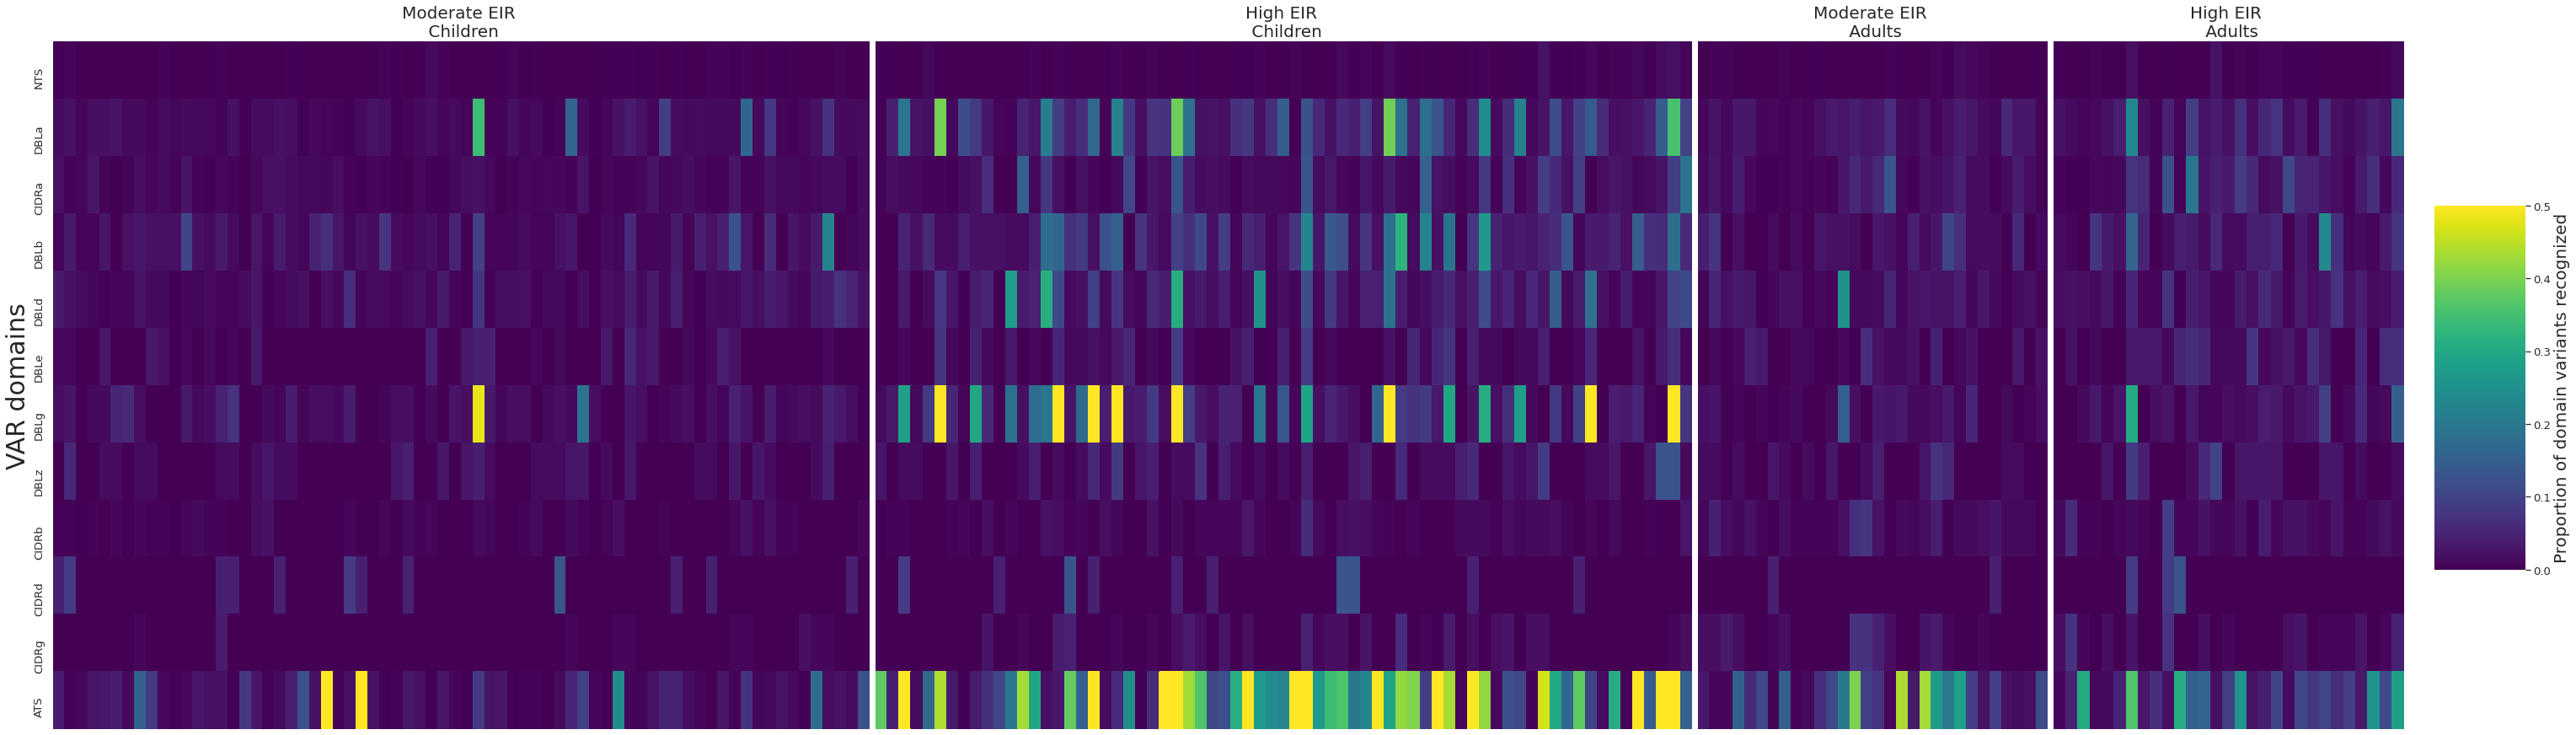

In [520]:



trial = df_hits_meta_combined.sort_values(by=['siteid','age'])
trial = trial.iloc[:,-12:]
trial = trial.astype(float) 

trial = trial[['NTS','DBLa','CIDRa','DBLb','DBLd','DBLe','DBLg','DBLz','CIDRb','CIDRd','CIDRg','ATS']]


from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
fig, (ax,ax2,ax3,ax4) = plt.subplots(ncols=4, gridspec_kw={'width_ratios': [70,70,30,30]},figsize = (50,15))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

fig.subplots_adjust(wspace=0.01)
sns.heatmap(trial.T.iloc[:,0:70],  ax=ax,  cmap = "viridis",cbar=True,vmin=0,vmax=0.5,xticklabels=False,yticklabels=True,rasterized=True,cbar_ax=cbar_ax,cbar_kws={'label': 'color_bar_label'})
sns.heatmap(trial.T.iloc[:,100:169],  ax=ax2,  cmap = "viridis",cbar=False,vmin=0,vmax=0.5,yticklabels=False,xticklabels=False,rasterized=True)
sns.heatmap(trial.T.iloc[:,70:100],  ax=ax3, cmap = "viridis",cbar=False,vmin=0,vmax=0.5,yticklabels=False,xticklabels=False,rasterized=True)
sns.heatmap(trial.T.iloc[:,169:198],  ax=ax4, cmap = "viridis", cbar=False,vmin=0,vmax=0.5,yticklabels=False,xticklabels=False,rasterized=True)


ax.set_ylabel('VAR domains',size=30,fontname = 'sans-serif')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')

ax.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

ax.set_title('Moderate EIR \n Children',size=20,fontname = 'sans-serif')
ax2.set_title('High EIR \n Children',size=20,fontname = 'sans-serif')
ax3.set_title('Moderate EIR \n Adults',size=20,fontname = 'sans-serif')
ax4.set_title('High EIR \n Adults',size=20,fontname = 'sans-serif')

ax.figure.axes[-1].set_ylabel('Proportion of domain variants recognized', size=20,fontname = 'sans-serif')
#ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(), fontsize = 3)
# cax = ax.gcf().axes[-1]
# cax.tick_params(labelsize=15)

#fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
plt.savefig('Fig2-supplementfigure7.pdf',dpi=800,bbox_inches='tight')
plt.show()